# 2007 Flights Data Exploration
## by Kim Gahn

## Investigation Overview

This investigation looked deeper into the relationship between airlines and origin location on flight delays and cancellations.

## Dataset Overview

This dataset was provided by RITA and contains information for more than 7 million flights originating in the United States in 2007.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_flights = pd.read_csv('df_flights.csv')
df_flights.head(1)

,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,DepDateTime,CRSDepDateTime,ArrDateTime,CRSArrDateTime,CarrierName,OrAirport,OrLocation,DeAirport,DeLocation,CRSDepHour
0,1,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,...,2007-01-01 12:32:00,2007-01-01 12:25:00,2007-01-01 13:41:00,2007-01-01 13:41:00,Southwest Airlines Co.,Sacramento International,"Sacramento, CA USA",Ontario International,"Ontario, CA USA",12.0


## What is the likelihood that a flight will be delayed?

Contrary to popular belief, long delays of more than 30 minutes in arrival are less frequent than arriving on time.  Many flights even arrive earlier than planned!

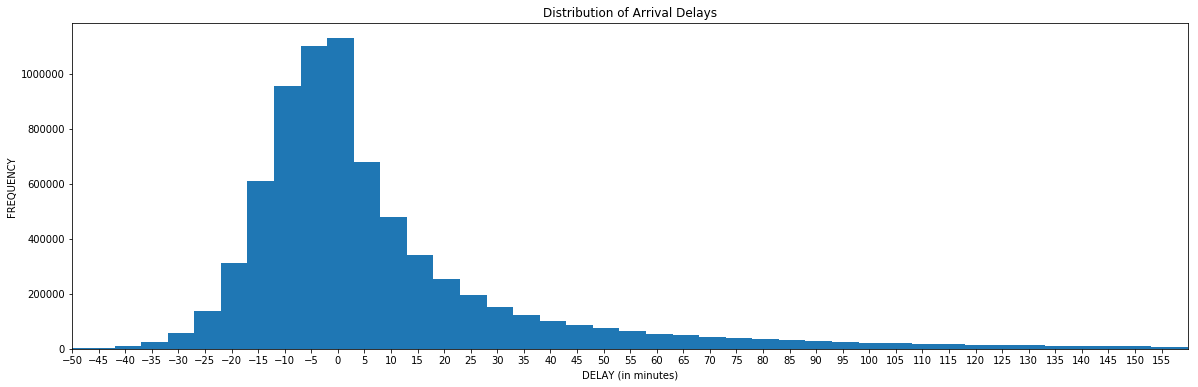

In [14]:
# Plot arrival delays
plt.figure(figsize = [20,6])
step = 5
x_min, x_max = -50, 160
bins = np.arange(df_flights.ArrDelay.min()-step, df_flights.ArrDelay.max() + step, step)
plt.hist(df_flights.ArrDelay.replace(np.nan, 0), bins = bins)
plt.xlim(x_min, x_max)
plt.title('Distribution of Arrival Delays')
plt.xlabel('DELAY (in minutes)')
plt.ylabel('FREQUENCY')
plt.xticks(np.arange(x_min, x_max, step));

## What are the best times to fly to avoid delays?

Delays greater than 30 minutes tend to occur more after mid-morning, and peak in the evening.

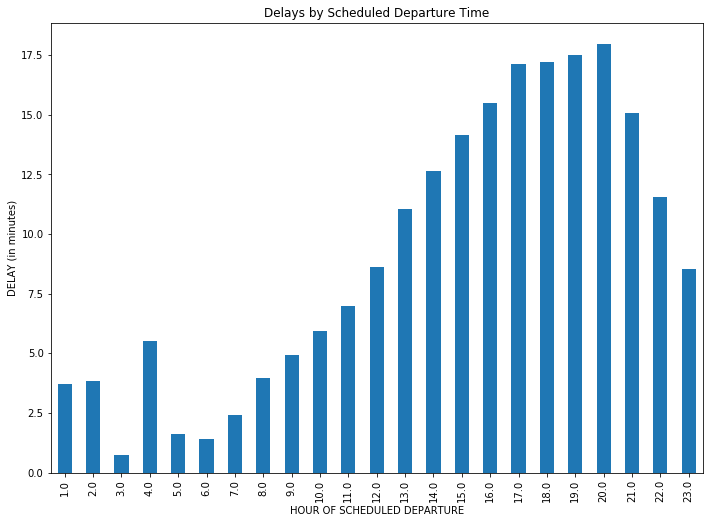

In [13]:
# Plot the arrival delays by hour
df_flights.groupby('CRSDepHour').agg({'ArrDelay':'mean'}).plot.bar(legend = None, figsize = [11.69, 8.27])
plt.title('Delays by Scheduled Departure Time')
plt.xlabel('HOUR OF SCHEDULED DEPARTURE')
plt.ylabel('DELAY (in minutes)')
plt.show();

## What airlines experience large delays more often?

Atlantic Southeast, American, JetBlue, and United airlines tend to have the most delays. Delta, Frontier, Aloha, and Hawaiian airlines tended to have fewer delays in 2007.

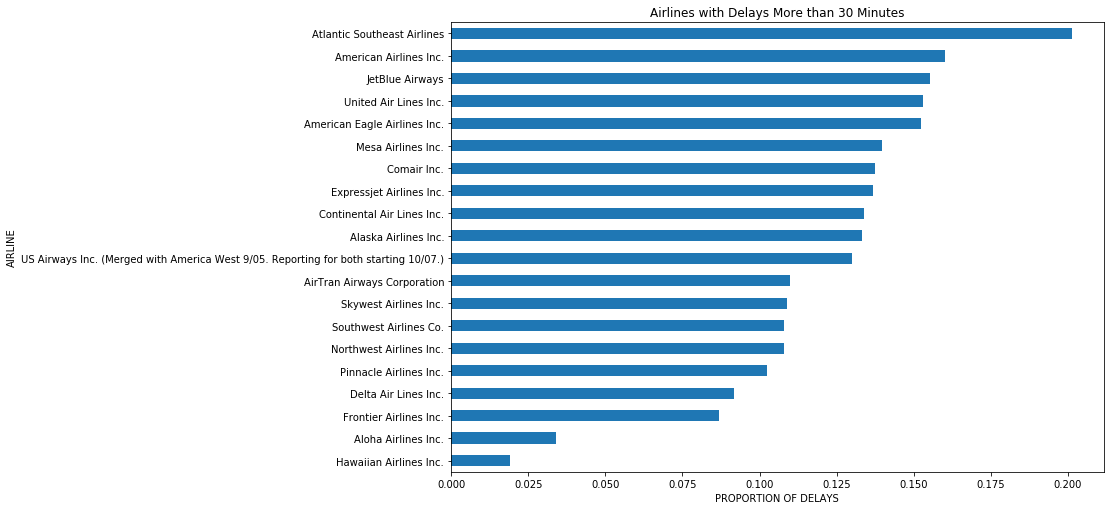

In [12]:
# Plot airlines delays
delay_carrier = df_flights.groupby(['CarrierName']).agg({'DepDelay':lambda x: (x>30).sum()/len(x)}).sort_values('DepDelay')
delay_carrier.plot(kind = 'barh', legend = None, figsize = [11.69, 8.27])
plt.title('Airlines with Delays More than 30 Minutes')
plt.xlabel('PROPORTION OF DELAYS')
plt.ylabel('AIRLINE')
plt.show();

## Are flights cancelled often?

Cancellations are extremely rare, in the 2007 only around 2% of flights in our dataset were cancelled.

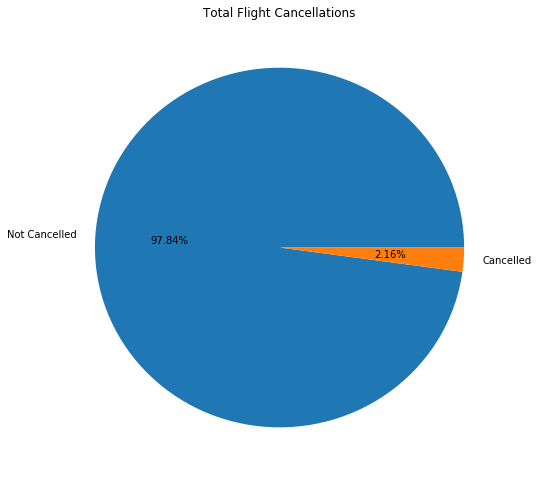

In [20]:
# Plot cancellations using a pie chart to emphasize distribution
plt.figure(figsize = [ 8.27, 8.27])
plt.pie(df_flights.Cancelled.value_counts(), autopct = '%.2f%%', labels = ("NOT CANCELLED", "CANCELLED"))
plt.title('Total Flight Cancellations');

## What are the reasons that a flight may be cancelled?
There were 160,748  cancellations in our 2007 data.  Of those cancellations, 66,779 were cancelled by the airline, 61,936 were due to weather, 31,995 were cancelled by the National Aviation System, and 39 were cancelled for security reasons.

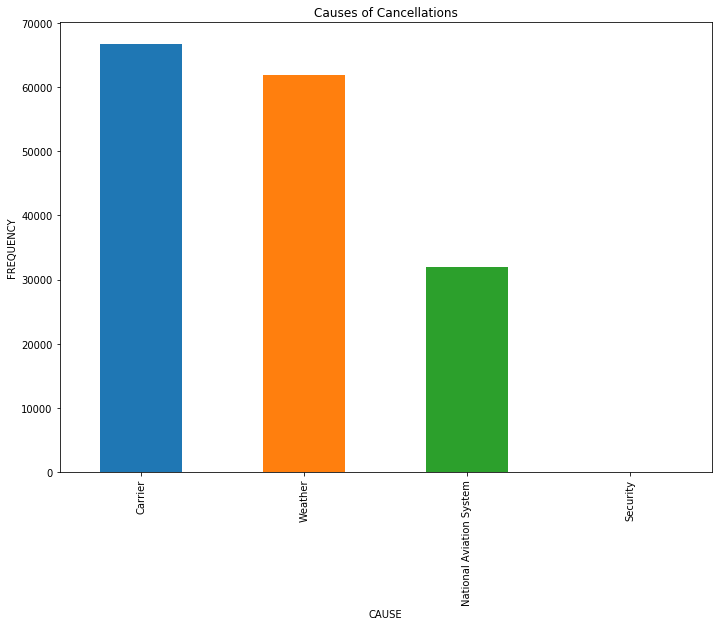

In [17]:
# Display the counts for each type of cancellation
codes = {'A':'Carrier', 'B':'Weather', 'C':'National Aviation System', 'D':'Security'}
cancels = df_flights.CancellationCode.value_counts()
cancels = cancels.rename(codes)
cancels

# Plot the cancellation codes using a countplot
plt.figure(figsize = [ 11.69, 8.27])
cancels.plot(kind = 'bar')
plt.title('Causes of Cancellations')
plt.xlabel('CAUSE')
plt.ylabel('FREQUENCY');

## What airlines tend to cancel more flights?
Southwest, American, Skywest, American Eagle and United airlines had the most cancellations in 2007.

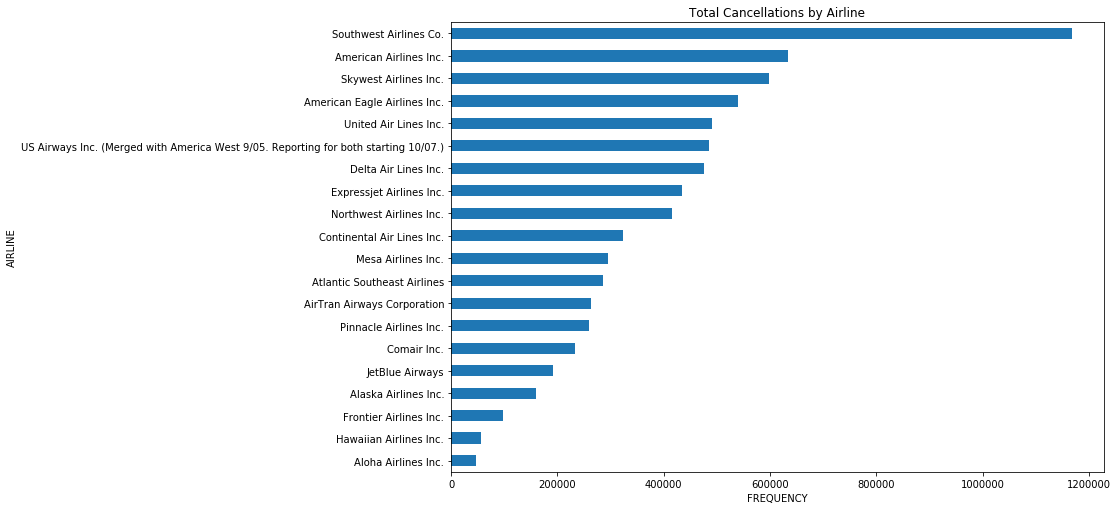

In [21]:
# Plot total cancellations by airline
carrier_cancel = df_flights.groupby(['CarrierName'], as_index = False)['Cancelled'].count().sort_values('Cancelled')
carrier_cancel.set_index("CarrierName", inplace = True)
carrier_cancel.plot(kind = 'barh', legend = None, figsize = [11.69, 8.27])
plt.title('Total Cancellations by Airline')
plt.xlabel('FREQUENCY')
plt.ylabel('AIRLINE');

In [ ]:
!jupyter nbconvert "2007-Flights-Data-Exploration_Slides.ipynb" --to slides --post serve --template output_toggle